In [2]:
#source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
#converter a array em dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [4]:
numpy.random.seed(7)

In [10]:
import pandas as pd

In [13]:
dataframe = pd.read_csv('C:\\Users\\vinic\\Desktop\\R\\timeseries_models\\datasets\\AirPassengers.csv', usecols=[1])# engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [31]:
dataframe

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [14]:
#normalizando
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset) 

In [15]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [16]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 0s - loss: 0.0317
Epoch 2/100
94/94 - 0s - loss: 0.0148
Epoch 3/100
94/94 - 0s - loss: 0.0109
Epoch 4/100
94/94 - 0s - loss: 0.0099
Epoch 5/100
94/94 - 0s - loss: 0.0091
Epoch 6/100
94/94 - 0s - loss: 0.0083
Epoch 7/100
94/94 - 0s - loss: 0.0074
Epoch 8/100
94/94 - 0s - loss: 0.0066
Epoch 9/100
94/94 - 0s - loss: 0.0059
Epoch 10/100
94/94 - 0s - loss: 0.0051
Epoch 11/100
94/94 - 0s - loss: 0.0044
Epoch 12/100
94/94 - 0s - loss: 0.0038
Epoch 13/100
94/94 - 0s - loss: 0.0032
Epoch 14/100
94/94 - 0s - loss: 0.0028
Epoch 15/100
94/94 - 0s - loss: 0.0026
Epoch 16/100
94/94 - 0s - loss: 0.0024
Epoch 17/100
94/94 - 0s - loss: 0.0022
Epoch 18/100
94/94 - 0s - loss: 0.0021
Epoch 19/100
94/94 - 0s - loss: 0.0021
Epoch 20/100
94/94 - 0s - loss: 0.0021
Epoch 21/100
94/94 - 0s - loss: 0.0020
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0020
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [22]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [23]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.66 RMSE
Test Score: 49.68 RMSE


In [24]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [25]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


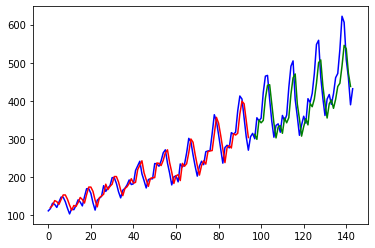

In [28]:
plt.plot(scaler.inverse_transform(dataset), color='blue')
plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot, color='green') 
plt.show() #tá com aquela ideia de, em t, prever t+1